# Speech to Text convertor

In [1]:
import torch
from transformers import Speech2TextProcessor, Speech2TextForConditionalGeneration
from datasets import load_dataset

In [2]:
import librosa
import librosa.display

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [4]:
import wave
import pyaudio

In [42]:
import IPython.display as ipd

In [30]:
import time

In [5]:
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100

In [7]:
p = pyaudio.PyAudio()
stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)
print("Start Recording...")
frames = []
seconds = 3
for i in range(0, int(RATE/CHUNK * seconds)):
    data = stream.read(CHUNK)
    frames.append(data)
print("Recording Stopped..")
stream.stop_stream()
stream.close()
p.terminate()

Start Recording...
Recording Stopped..


In [9]:
wf = wave.open("output.wav", 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

In [76]:
def save_audio_file(seconds=5, CHUNK = 1024, FORMAT = pyaudio.paInt16, CHANNELS = 1, RATE = 22050):
    # Record the audio
    p = pyaudio.PyAudio()
    stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)
    print("Started Recording for" + str(seconds) + "seconds...")
    frames = []
    
    for i in range(0, int(RATE/CHUNK * seconds)):
        data = stream.read(CHUNK)
        frames.append(data)
        
    print("Recording Stopped..")
    stream.stop_stream()
    stream.close()
    p.terminate()
    
    #Saving the audio
    file_name = 'output_' + str(int(time.time())) + '.wav' 
    wf = wave.open("../Dataset/Temp/"+file_name, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()
    
    return file_name

In [33]:
save_audio_file()

Started Recording for5seconds...
Recording Stopped..


In [21]:
model = Speech2TextForConditionalGeneration.from_pretrained("facebook/s2t-small-librispeech-asr")
processor = Speech2TextProcessor.from_pretrained("facebook/s2t-small-librispeech-asr")

In [50]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC

In [51]:
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

Downloading:   0%|          | 0.00/159 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/163 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


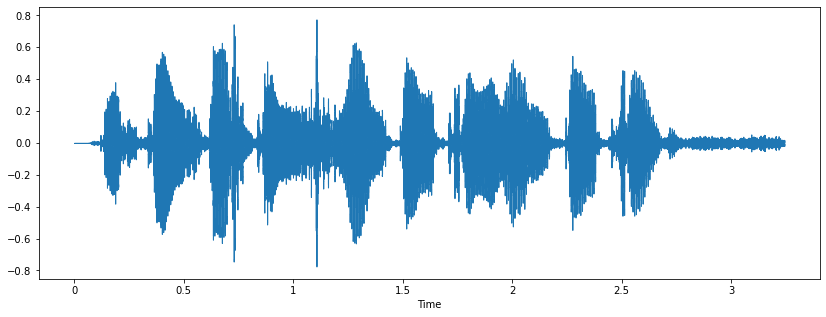

In [67]:
audio_file_path = "../Dataset/Temp/test.wav"
plt.figure(figsize=(14, 5))
data, sample_rate = librosa.load(audio_file_path)
librosa.display.waveshow(data)
ipd.Audio(audio_file_path)

In [68]:
sample_rate

22050

In [64]:
input_values = processor(data, sampling_rate=sample_rate, return_tensors="pt", padding="longest").input_values
logits = model(input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)
transcription = processor.batch_decode(predicted_ids)

In [65]:
transcription

['ESTINGTESTING ONE TOTY ONE TOTRY']

In [69]:
input_values = processor(data, return_tensors="pt", padding="longest").input_values
logits = model(input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)
transcription = processor.batch_decode(predicted_ids)
transcription

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


['EXCHANGE THEIR TRANG ONE TWO THREE ONE TWO THREE']

In [82]:
def speech_to_text(model, processor, audio_file):
    data, sample_rate = librosa.load(audio_file, sr=16000)
    input_values = processor(data, sampling_rate=sample_rate, return_tensors="pt", padding="longest").input_values
    logits = model(input_values).logits
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)
    return transcription

In [83]:
speech_to_text(model, processor, "../Dataset/Temp/test.wav")

['ESTINGTESTING ONE TOTY ONE TOTRY']

## Final Testing

In [84]:
fn = save_audio_file()

Started Recording for5seconds...
Recording Stopped..


In [88]:
fn

'output_1663920461.wav'

In [90]:
speech_to_text(model, processor, '../Dataset/Temp/test.wav')

['ESTINGTESTING ONE TOTY ONE TOTRY']